<a href="https://colab.research.google.com/github/valecitap/roboticafcfm2022/blob/main/Auxiliar_2_Pautasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auxiliar 2: Shape Detection

La Transformada de Hough es una técnica que permite detectar geometrías en una imagen, mientras esta pueda ser parametrizada matemáticamente. Mediante su matriz acumuladora de votos, logra detectar recta y círculos incluso si estos presentan ruido o irregularidades.

En este taller utilizaremos las implementaciones de la Transformada de Hough en OpenCV para identificar las rectas en la siguiente imágen.

<img src="https://raw.githubusercontent.com/RaimundoLorca/roboticafcfm2021-2/main/bin/Calle_ready.jpg" height="300">

## OpenCV

La Open Surce Computer Vision es una librería especializada en herramientas de visión computacional y en todo lo que respecta a visión artificial en general. De este modo provee de funcionalidades de todo tipo de complejidad, desde operaciones básicas de procesamiento de imágenes, hasta algoritmos de reconocimiento de objetos.

Por supuesto, esta librería cuenta con su documentación correspondiente. En esta puede encontrar descripciones más detalladas de sus funcionalidades, así como también ejemplos, tutoriales y otros.

https://docs.opencv.org/master/

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/auxiliar_01/bin/opencv_logo.png" height="200">

##Cargar repositorio Github

La imagen con que trabajaremos en este taller se encuentra en el repositorio del curso, de este modo lo primero que haremos será clonar este github.

In [1]:
!git clone https://github.com/valecitap/roboticafcfm2022.git
%cd /content/roboticafcfm2022

Cloning into 'roboticafcfm2022'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 104 (delta 21), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 7.17 MiB | 14.92 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/roboticafcfm2022


##Cargar imagen 1

Para cargar las imagenes con OpenCV, se utiliza la función `cv2.imread`, la cual necesita la ubicación del archivo con el que estamos trabajando. En este caso, el path es `"//content//roboticafcfm2022//Auxiliar2//Calle.png"`.


(-0.5, 649.5, 324.5, -0.5)

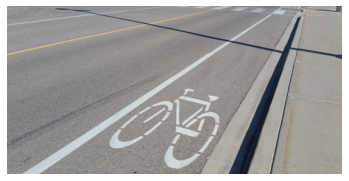

In [2]:
#Cargar librerias a usar
import cv2
import numpy as np
import matplotlib.pyplot as plot

#Cargar imagen
img = cv2.imread("//content//roboticafcfm2022//Auxiliar2//Calle.png")

#Cambiar espacio de colores (BGR A RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_rgb)
plot.axis("off")

Una vez hemos cargado la imagen, podemos empezar el proceso de identificar las rectas. No obstante, dado que la Transformada de Hough de rectas requiere, por supuesto, que existan rectas en la imagen, tenemos que extraer los bordes de esta imagen para poder procesarla. Para esto podemos utilizar el método `cv2.Canny`.

[Documentación Canny Edge Detection OpenCV](https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html)

(-0.5, 649.5, 324.5, -0.5)

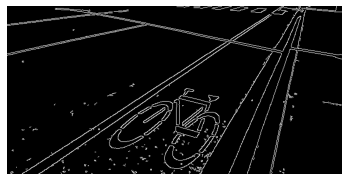

In [3]:
#%% Detectar bordes mediante Canny

#Cambiar espacio de colores (RGB A GRAYSCALE)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Canny (cv2.Canny)
edges = cv2.Canny(img_gray, 100, 200)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(edges, cmap='gray')
plot.axis('off')

## Hough Line Transform

Todo el algoritmo de la Transformada de Hough ha sido implementado en OpenCV mediante el método `cv2.HoughLines`. Este método retorna un `np.array` con los parámetros `(rho, theta)` de cada una de las rectas detectadas. Por supuesto, para operar requiere una imagen binaria como nuestra imagen `edges`, la resolución de búsqueda para los parámetros `(rho, theta)`, y el umbral de votos para segmentar las rectas detectadas.

[Documentación Hough Lines OpenCV](https://docs.opencv.org/3.4/d3/de6/tutorial_js_houghlines.html)

In [4]:
# Utilizar HoughLines sobre la imagen
lines = cv2.HoughLines(edges, rho=1.0, theta=np.pi/360, threshold=200)

# Print resultado de rectas
print('Cantidad de rectas detectadas:\n', len(lines))
print('rectas detectadas:\n', lines)

Cantidad de rectas detectadas:
 11
rectas detectadas:
 [[[ 3.0300000e+02  9.6865773e-01]]

 [[ 2.8900000e+02  9.9483764e-01]]

 [[ 2.8700000e+02  1.0035644e+00]]

 [[-2.2000000e+01  1.7802358e+00]]

 [[ 3.0100000e+02  9.7738439e-01]]

 [[-1.7000000e+01  1.7627826e+00]]

 [[-2.1000000e+01  1.7715092e+00]]

 [[ 5.6700000e+02  2.1816616e-01]]

 [[ 4.8700000e+02  5.4105204e-01]]

 [[ 9.2000000e+01  1.3613569e+00]]

 [[ 4.8500000e+02  5.4977870e-01]]]


Notemos que el resultado consiste en una lista de listas. Por lo que al procesar esta información debemos cuidar el como la extraemos.

Ahora bien, una vez tenemos los parámetros `(rho, theta)` para cada recta, podemos transformar esta parametrización tal de poder plotear las rectas identificadas en la imagen mediante la función `cv2.line`.


(-0.5, 649.5, 324.5, -0.5)

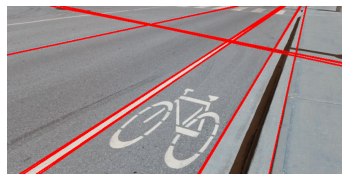

In [5]:
# cargar imagen
img_lines = np.copy(img_rgb)
img_lines = cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)

# para cada recta detectada
for line in lines:
  # obtener parámetros (rho, theta)
  rho, theta = line[0]

  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho

  # obtener recta (x1,y1), (x2,y2)
  x1 = int(x0 + 1000*(-b))
  y1 = int(y0 + 1000*(a))
  x2 = int(x0 - 1000*(-b))
  y2 = int(y0 - 1000*(a))

  # plotear recta en la imagen con cv2.line
  color = (255, 0, 0)
  thickness = 2
  img_lines = cv2.line(img_lines, (x1, y1), (x2, y2), color, thickness)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_lines)
plot.axis('off')

##Cargar imagen 2

Para cargar las imagenes con OpenCV, se utiliza la función `cv2.imread`, la cual necesita la ubicación del archivo con el que estamos trabajando. En este caso, el path es `"//content//roboticafcfm2022//Auxiliar2//Tennis_balls2.jpg"`.

(-0.5, 639.5, 442.5, -0.5)

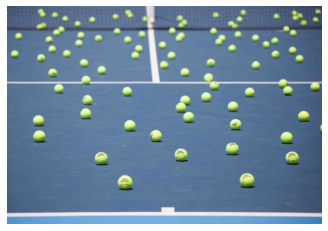

In [6]:
#Cargar imagen
img = cv2.imread("//content//roboticafcfm2022//Auxiliar2//Tennis_balls2.jpg")

#Cambiar espacio de colores (BGR A RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img_rgb)
plot.axis("off")

Como las pelotas son nuestro objeto de interés, llevaremos a cabo un proceso de segmentación por color para aislar solo las pelotas. Al igual que en la auxiliar pasada, se utilizará el espacio de color HSV, identificando el matiz del color de las pelotas.

Text(0, 0.5, 'Frecuencia')

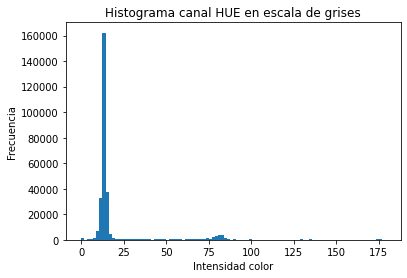

In [7]:
#Cambiar espacio de colores (BGR A RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#Extraer canal Hue
img_hue = img_hsv[:, :, 0]

#Se convierte la matriz de la imagen a un vector
img_flat = img_hue.flatten()

#Plotear histograma con Matplotlib
plot.figure()
plot.hist(img_flat, 100)
plot.title('Histograma canal HUE en escala de grises')
plot.xlabel('Intensidad color')
plot.ylabel('Frecuencia')


(-0.5, 639.5, 442.5, -0.5)

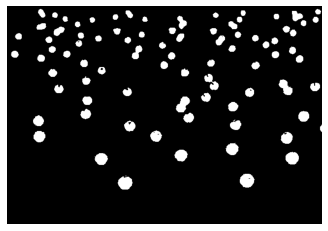

In [8]:
#Definir límite inferior
lower_hsv = np.array( [50, 50, 0] )

#Definir límite superior
upper_hsv = np.array( [100, 255, 255] )

#Segmentar mediante cv2.inRange
mask = cv2.inRange(img_hsv, lower_hsv, upper_hsv)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(mask, cmap='gray')
plot.axis("off")

Dado que la Transformada de Hough de circulos requiere, por supuesto, que existan rectas en la imagen, tenemos que extraer los bordes de esta imagen para poder procesarla. Para esto podemos utilizar el método `cv2.Canny`.

[Documentación Canny Edge Detection OpenCV](https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html)

(-0.5, 639.5, 442.5, -0.5)

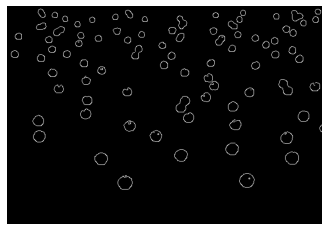

In [9]:
#Canny (cv2.Canny)
edges = cv2.Canny(mask, 100, 200)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(edges, cmap='gray')
plot.axis('off')

##Hough Circle Transform

Todo el algoritmo de la Transformada de Hough ha sido implementado en OpenCV mediante el método `cv2.HoughCircles`. Este método retorna un `np.array` con los parámetros `(x,y,radius)` de cada uno de los circulos detectados. Por supuesto, para operar requiere una imagen binaria como nuestra imagen `edges`, el umbral de votos para segmentar los circulos detectados, la distancia minima entre los circulos detectados, etc.

[Documentación Hough Circles OpenCV](https://docs.opencv.org/4.5.1/d3/de5/tutorial_js_houghcircles.html)

(-0.5, 639.5, 442.5, -0.5)

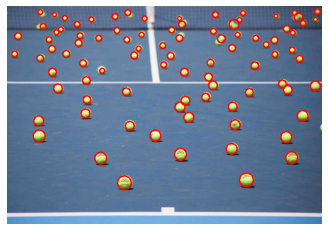

In [10]:
#Transformada hough circulos (cv2.HoughCircles)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=12, maxRadius=20)

img_rgb2 = np.copy(img_rgb)

#Para cada circulo detectado
for circle in circles[0]:
  centro = (int(circle[0]), int(circle[1]))
  radio = int(circle[2])
  color = (255, 0, 0)
  thickness = 2
  img = cv2.circle(img_rgb2, centro, radio, color, thickness)

#Plotear imagen con Matplotlib
plot.figure()
plot.imshow(img)
plot.axis('off')
